In [1]:
#导入库
import cv2

In [2]:
#图像读取与显示
img = cv2.imread(r'.\Eddie.jpg')
cv2.imshow('Eddie', img)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [3]:
#图像crop 通道分离 通道交换
shape = img.shape
channels = len(img.shape)
img_crop = img[0:int(shape[0]*0.8), 0:int(shape[1]*0.8)]
B,G,R = cv2.split(img_crop)
img_channel_switch = cv2.merge((R,G,B))
cv2.imshow('Crop', img_crop)
cv2.imshow('B', B)
cv2.imshow('G', G)
cv2.imshow('R',R)
#原图R通道值较大，将其与B通道互换后，秒变阿凡达
cv2.imshow('switch', img_channel_switch)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [4]:
#颜色变换(各通道分别提亮或变暗)
import random
def modify_sigle_channel(input, value):
    if value == 0:
        pass
    elif value > 0:
        thre = 255 - value
        input[input >= thre] = 255
        input[input < thre] = input[input < thre] + value
    else:
        thre = 0 - value
        input[input < thre] = 0
        input[input > thre] = input[input > thre] + value
        
rand_val_B = random.randint(-50, 50)
rand_val_G = random.randint(-50, 50)
rand_val_R = random.randint(-50, 50)
modify_sigle_channel(B, rand_val_B)
modify_sigle_channel(G, rand_val_B)
modify_sigle_channel(R, rand_val_B)
img_color_modify = cv2.merge((B,G,R))
cv2.imshow('B', B)
cv2.imshow('G', G)
cv2.imshow('R',R)
cv2.imshow('modify', img_color_modify)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
cv2.imwrite("img.jpg", img_crop)   
cv2.imwrite("img_modify.jpg", img_color_modify)   

True

In [6]:
#图像旋转 
def img_rotate(img, angle, scale):
    trans_kernel = cv2.getRotationMatrix2D((shape[1] / 2, shape[0] / 2), angle, scale)
    img_trans = cv2.warpAffine(img, trans_kernel, (shape[1], shape[0]))
    return img_trans
img_trans = img_rotate(img, 30, 0.75)
cv2.imshow('img_trans', img_trans)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [17]:
#仿射变换
import numpy as np
def img_affine_trans(img, pt1, pt2):
    height, width, ch = img.shape
    M = cv2.getAffineTransform(pt1, pt2)
    img_trans = cv2.warpAffine(img, M, (shape[1], shape[0]))
    return img_trans

pt1 = np.float32([[0, 0], [0, height - 1], [width - 1, 0]])
pt2 = np.float32([[height * 0.05, width * 0.05], [width * 0.1, height * 0.5], [width  * 0.5, height * 0.1]])
img_trans = img_affine_trans(img, pt1, pt2)
cv2.imshow('img_trans', img_trans)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [18]:
 #透视图变换
def random_warp(img, row, col):
    height, width, channels = img.shape

    # warp:
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)

    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)

    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img, M_warp, (width, height))
    return M_warp, img_warp


M_warp, img_warp = random_warp(img, img.shape[0], img.shape[1])
cv2.imshow('Eddie_warp', img_warp)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

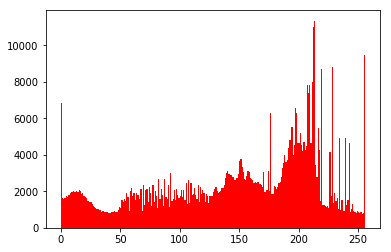

In [39]:
#直方图操作
from matplotlib import pyplot as plt
img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
img_YUV[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
img_back = cv2.cvtColor(img_YUV, cv2.COLOR_YUV2RGB)
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.hist(img_back.flatten(), 256, [0, 256], color='r')
cv2.imshow('Eddie', img_back)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

In [33]:
#Gamma变换
def gamma_adjust(img, gamma=1.0):
    inv_gamma = 1 / gamma
    table = []
    for i in range(256):
        table.append((i / 255) ** inv_gamma * 255)
    table = np.array(table).astype("uint8")
    return cv2.LUT(img, table)
    
img_darker = gamma_adjust(img, 0.5)
cv2.imshow('img_brighter', img_darker)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()
    